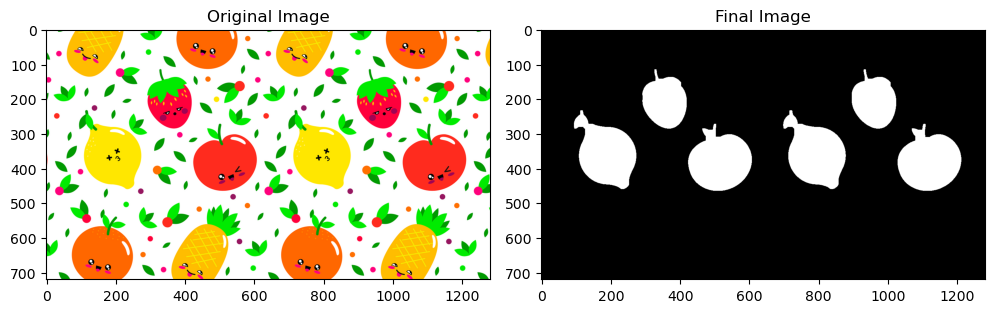

Final number of objects: 6


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import reconstruction
from scipy.ndimage import label, find_objects

image = cv2.imread('COMP9517_24T2_Lab4_Images/Fruits.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresholded_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

lower_bound = 40
upper_bound = 240
_, lower_threshold = cv2.threshold(gray_image, lower_bound, 255, cv2.THRESH_BINARY)
_, upper_threshold = cv2.threshold(gray_image, upper_bound, 255, cv2.THRESH_BINARY_INV)
segmented_image = cv2.bitwise_and(lower_threshold, upper_threshold)

small_kernel = np.ones((5, 5), np.uint8)
large_kernel = np.ones((7, 7), np.uint8)

opened_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, small_kernel)

closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, small_kernel)

border_markers = np.zeros_like(closed_image)
border_markers[0, :] = closed_image[0, :]
border_markers[-1, :] = closed_image[-1, :]
border_markers[:, 0] = closed_image[:, 0]
border_markers[:, -1] = closed_image[:, -1]

reconstructed = reconstruction(border_markers, closed_image, method='dilation')

cleaned_image = closed_image - reconstructed

labeled_image, num_features = label(cleaned_image)

size_threshold = 2800 

mask = np.zeros_like(labeled_image, dtype=np.uint8)
object_slices = find_objects(labeled_image)
for i, object_slice in enumerate(object_slices, start=1):
    object_region = labeled_image[object_slice] == i
    if np.sum(object_region) >= size_threshold:
        mask[object_slice][object_region] = 255

filtered_image = cv2.bitwise_and(cleaned_image, cleaned_image, mask=mask)

large_kernel=np.ones((13, 13), np.uint8)
# ofinal_filtered_image = cv2.morphologyEx(filtered_image, cv2.MORPH_CLOSE, large_kernel)
dfinal_filtered_image = cv2.morphologyEx(filtered_image, cv2.MORPH_CLOSE, large_kernel)
final_labeled_image1, final_num_features = label(filtered_image)
final_labeled_image=dfinal_filtered_image

plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


plt.subplot(2, 3, 2)
plt.title('Final Image')
plt.imshow(final_labeled_image, cmap='gray')

plt.tight_layout()
plt.show()

print(f'Final number of objects: {final_num_features}')

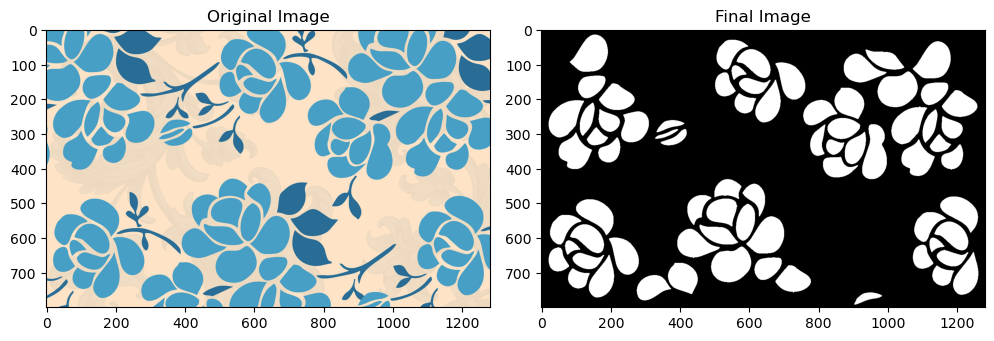

Final number of objects: 72


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import reconstruction
from scipy.ndimage import label, find_objects

image = cv2.imread('COMP9517_24T2_Lab4_Images/Leaves.png')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_light_blue = np.array([90, 50, 100])
upper_light_blue = np.array([130, 170, 300])

mask = cv2.inRange(hsv_image, lower_light_blue, upper_light_blue)

kernel = np.ones((3, 3), np.uint8)
opened_image = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

border_markers = np.zeros_like(closed_image)
border_markers[0, :] = closed_image[0, :]
border_markers[-1, :] = closed_image[-1, :]
border_markers[:, 0] = closed_image[:, 0]
border_markers[:, -1] = closed_image[:, -1]

reconstructed = reconstruction(border_markers, closed_image, method='dilation')

cleaned_image = closed_image - reconstructed

labeled_image, num_features = label(cleaned_image)

size_threshold = 500 

final_mask = np.zeros_like(labeled_image, dtype=np.uint8)

object_slices = find_objects(labeled_image)
for i, object_slice in enumerate(object_slices, start=1):
    object_region = labeled_image[object_slice] == i
    if np.sum(object_region) >= size_threshold:
        final_mask[object_slice][object_region] = 255

filtered_image = cv2.bitwise_and(cleaned_image, cleaned_image, mask=final_mask)

final_labeled_image1, final_num_features = label(filtered_image)
final_labeled_image = filtered_image

plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Final Image')
plt.imshow(final_labeled_image, cmap='gray')

plt.tight_layout()
plt.show()

print(f'Final number of objects: {final_num_features}')

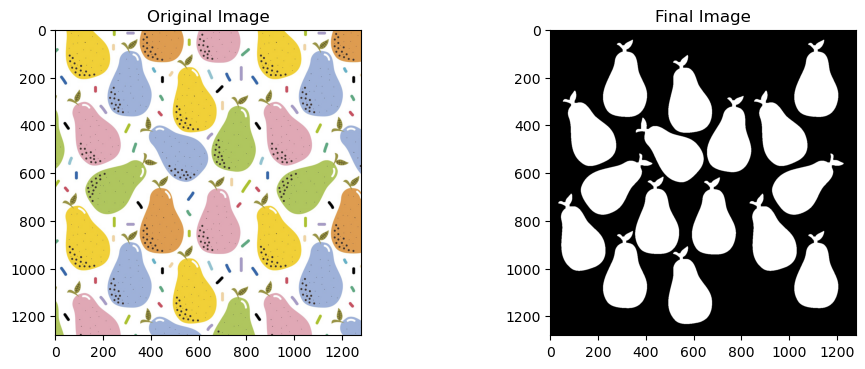

Final number of objects: 16


In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import reconstruction
from scipy.ndimage import label, find_objects

image = cv2.imread('COMP9517_24T2_Lab4_Images/Pears.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresholded_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

lower_bound = 40
upper_bound = 220
_, lower_threshold = cv2.threshold(gray_image, lower_bound, 255, cv2.THRESH_BINARY)
_, upper_threshold = cv2.threshold(gray_image, upper_bound, 255, cv2.THRESH_BINARY_INV)
segmented_image = cv2.bitwise_and(lower_threshold, upper_threshold)

small_kernel = np.ones((4, 4), np.uint8)

opened_image = cv2.morphologyEx(segmented_image, cv2.MORPH_OPEN, small_kernel)

closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, small_kernel)

border_markers = np.zeros_like(closed_image)
border_markers[0, :] = closed_image[0, :]
border_markers[-1, :] = closed_image[-1, :]
border_markers[:, 0] = closed_image[:, 0]
border_markers[:, -1] = closed_image[:, -1]

reconstructed = reconstruction(border_markers, closed_image, method='dilation')

cleaned_image = closed_image - reconstructed

labeled_image, num_features = label(cleaned_image)

size_threshold = 2800 

mask = np.zeros_like(labeled_image, dtype=np.uint8)
object_slices = find_objects(labeled_image)
for i, object_slice in enumerate(object_slices, start=1):
    object_region = labeled_image[object_slice] == i
    if np.sum(object_region) >= size_threshold:
        mask[object_slice][object_region] = 255

filtered_image = cv2.bitwise_and(cleaned_image, cleaned_image, mask=mask)

large_kernel = np.ones((9, 9), np.uint8)
dfinal_filtered_image = cv2.morphologyEx(filtered_image, cv2.MORPH_CLOSE, large_kernel)
final_labeled_image1, final_num_features = label(filtered_image)
final_labeled_image=dfinal_filtered_image

plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Final Image')
plt.imshow(final_labeled_image, cmap='gray')

plt.tight_layout()
plt.show()

print(f'Final number of objects: {final_num_features}')